# Visualisations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.helper.plotting import create_3_panel_plot
from src.plane.coordinate_system import CoordinateSystem
from src.plane.plane import PaperPlane
from src.plane.math_functions import yaw_pitch_roll_to_matrix

## Drawing a Coordinate System

X-Axis = Made up by the points: [0,0,0] -> [1,0,0]
Y-Axis = Made up by the points: [0,0,0] -> [0,1,0]
Z-Axis = Made up by the points: [0,0,0] -> [0,0,1]



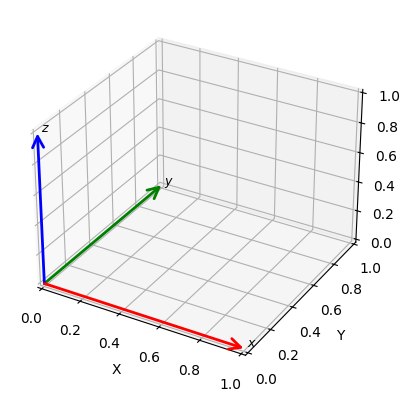

In [5]:
points=np.array([[[0,0,0], [1,0,0]], [[0,0,0], [0,1,0]], [[0,0,0], [0,0,1]]])
cs = CoordinateSystem(points=points)


# Expected is the following print:
"""
X-Axis = Made up by the points: [0,0,0] -> [1,0,0]
Y-Axis = Made up by the points: [0,0,0] -> [0,1,0]
Z-Axis = Made up by the points: [0,0,0] -> [0,0,1]
"""
print(cs)
print("")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

cs.plot_coordinates(ax=ax, lw=2)

plt.show()

## Matrix Rotation


**Die Rotationsmatrix:**

\begin{align}
R=
\begin{bmatrix}
r_{11} & r_{12} & r_{13}\\
r_{21} & r_{22} & r_{23}\\
r_{31} & r_{32} & r_{33}
\end{bmatrix}
\end{align}

**Euler Winkel Konvertiert in eine Rotationsmatrix:**

\begin{align}
R=
\begin{bmatrix}
\text{cos}(\theta)\text{cos}(\psi) & \text{sin}(\phi)\text{sin}(\theta)\text{cos}(\psi) - \text{cos}(\phi)\text{sin}(\psi) & \text{sin}(\phi)\text{sin}(\psi) + \text{cos}(\phi)\text{sin}(\theta)\text{cos}(\psi)\\
\text{cos}(\theta)\text{sin}(\psi) & \text{cos}(\phi)\text{cos}(\psi) + \text{sin}(\phi)\text{sin}(\theta)\text{sin}(\psi) & \text{cos}(\phi)\text{sin}(\theta)\text{sin}(\psi)-\text{sin}(\phi)\text{cos}(\psi)\\
-\text{sin}(\theta) & \text{sin}(\phi)\text{cos}(\theta) & \text{cos}(\phi)\text{cos}(\theta)
\end{bmatrix}
\end{align}

As an example we rotate 45° around the z-axis and 90° around the y-axis.
According to my textbook the following matrix is expected:

\begin{bmatrix}
0 & -0.7071 & 0.7071\\
0 & 0.7071 & 0.7071\\
-1 & 0 & 0
\end{bmatrix}


In [12]:
yaw_pitch_roll_to_matrix(yaw=45, pitch=90, round_to_decimal_places=4)

array([[ 0.    , -0.7071,  0.7071],
       [ 0.    ,  0.7071,  0.7071],
       [-1.    ,  0.    ,  0.    ]])

### Rotating the Ground Coordinate System

### Rotation von Punkten durch eine Rotationsmatrix:

Mit der Rotationsmatrix kann ein beliebiger Punkt mit folgender Formel rotiert werden:

\begin{align}
\begin{bmatrix}
x_{1}\\
y_{1}\\
z_{1}
\end{bmatrix}
=R\begin{bmatrix}
x_{0}\\
y_{0}\\
z_{0}
\end{bmatrix}
\end{align}

Mit $(x_1, y_1, z_1)$ als Koordinaten nach der Rotation.

**Testcase #1 - 90° - Yaw**

\begin{align}
\text{Coordinate System}
= R = \begin{bmatrix}
0&-1&0\\
1&0&0\\
0&0&1
\end{bmatrix}
\end{align}

**Testcase #2 - 90° - Pitch**

\begin{align}
\text{Coordinate System}
= R = \begin{bmatrix}
0&0&1\\
0&1&0\\
-1&0&0
\end{bmatrix}
\end{align}

**Testcase #3 - 90° - Roll**

\begin{align}
\text{Coordinate System}
= R = \begin{bmatrix}
1&0&0\\
0&0&-1\\
0&1&0
\end{bmatrix}
\end{align}

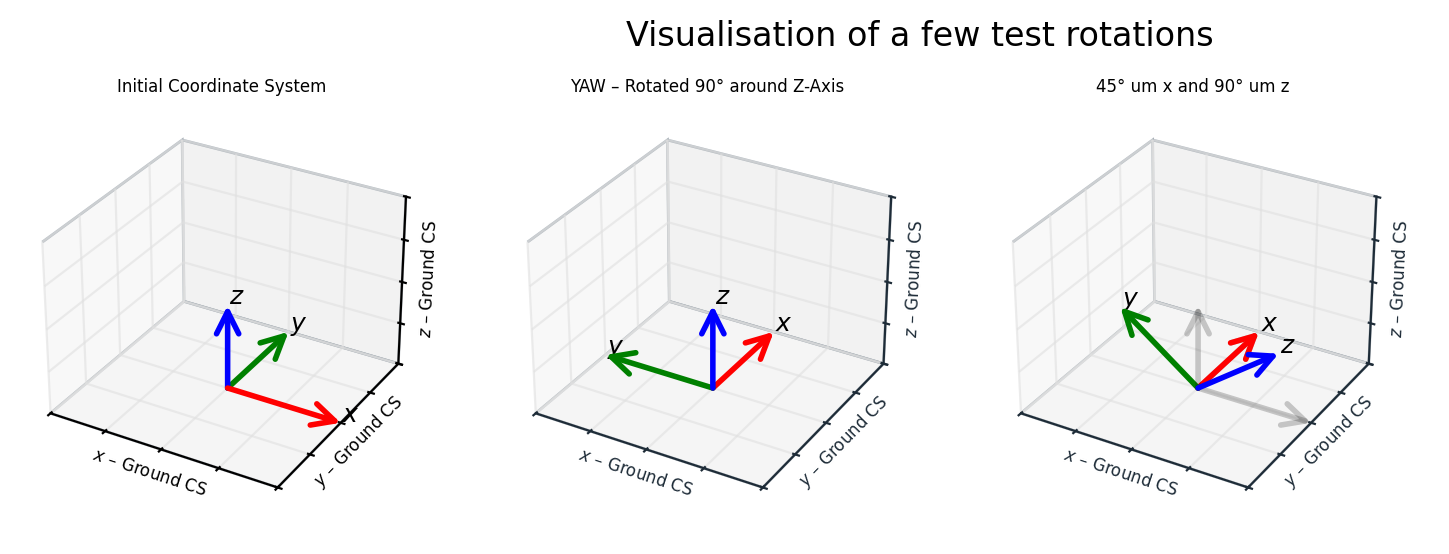

In [10]:
ax1, ax2, ax3 = create_3_panel_plot(sup_title="Visualisation of a few test rotations",
                                    title_1="Initial Coordinate System",
                                    title_2="YAW – Rotated 90° around Z-Axis",
                                    title_3="45° um x and 90° um z",
                                    show_labels=True, show_ticks=False,
                                    x_lim=[-1,1],y_lim=[-1,1],z_lim=[0,2])


# ##############################################################################

cs = CoordinateSystem(points=np.array([[[0,0,0], [1,0,0]], [[0,0,0], [0,1,0]], [[0,0,0], [0,0,1]]]))
cs.plot_coordinates(ax=ax1, lw=2)

# ##############################################################################

rotation_matrix = yaw_pitch_roll_to_matrix(yaw=90, round_to_decimal_places=4)
cs.matrix_rotate(rotation_matrix)
cs.plot_coordinates(ax=ax2, lw=2)

# ##############################################################################

cs = CoordinateSystem(points=np.array([[[0,0,0], [1,0,0]], [[0,0,0], [0,1,0]], [[0,0,0], [0,0,1]]]))

cs.plot_coordinates(ax=ax3, lw=2, colors=[[0,0,0,0.2],[0,0,0,0.2],[0,0,0,0.2]], show_labels=False)

rotation_matrix = yaw_pitch_roll_to_matrix(roll=45, yaw=90, round_to_decimal_places=4)
cs.matrix_rotate(rotation_matrix)
cs.plot_coordinates(ax=ax3, lw=2)


plt.show()

## Drawing a Paper Plane

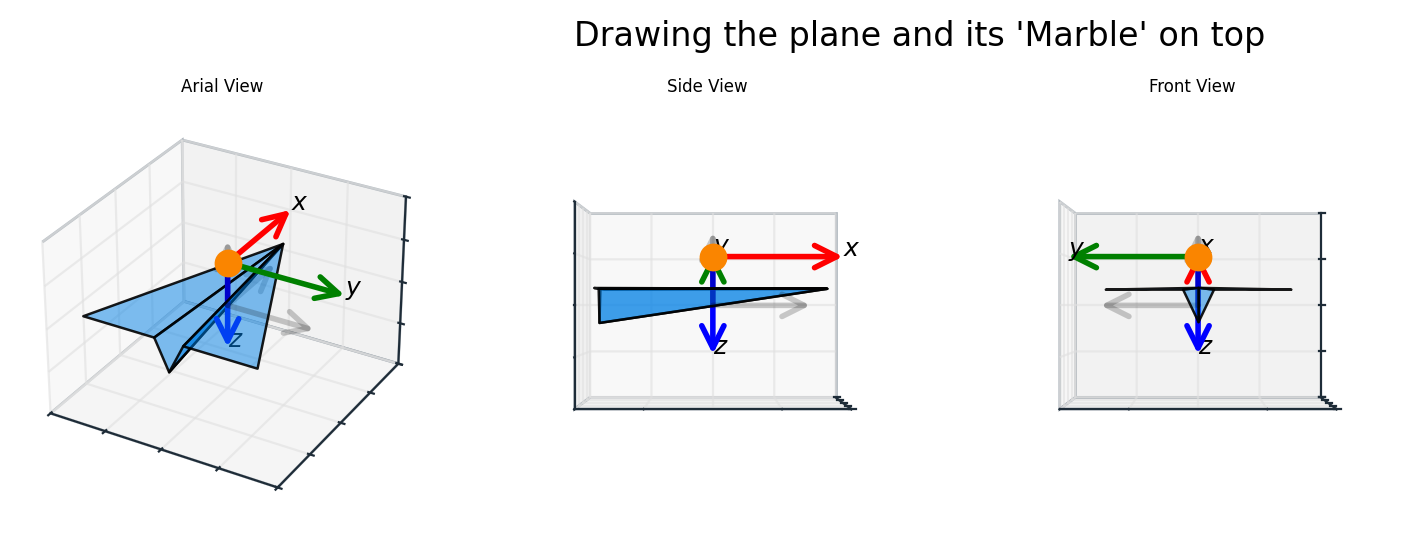

In [7]:
ax1, ax2, ax3 = create_3_panel_plot(sup_title="Drawing the plane and its 'Marble' on top", title_1="Arial View", title_2="Side View", title_3="Front View")


plane = PaperPlane()
cs = CoordinateSystem(points=np.array([[[0,0,0], [3,0,0]], [[0,0,0], [0,3,0]], [[0,0,0], [0,0,3]]]))

plane.draw(ax1)

cs.plot_coordinates(ax=ax1, colors=[[0,0,0,0.2],[0,0,0,0.2],[0,0,0,0.2]], show_labels=False)


# ##############################################################################

plane.draw(ax2)

cs.plot_coordinates(ax=ax2, colors=[[0,0,0,0.2],[0,0,0,0.2],[0,0,0,0.2]], show_labels=False)

ax2.view_init(elev=0, azim=0, roll=0)

# ##############################################################################

plane.draw(ax3)

cs.plot_coordinates(ax=ax3, colors=[[0,0,0,0.2],[0,0,0,0.2],[0,0,0,0.2]], show_labels=False)

ax3.view_init(elev=0, azim=90, roll=0)

# ##############################################################################

plt.show()

### Test Plane Rotations

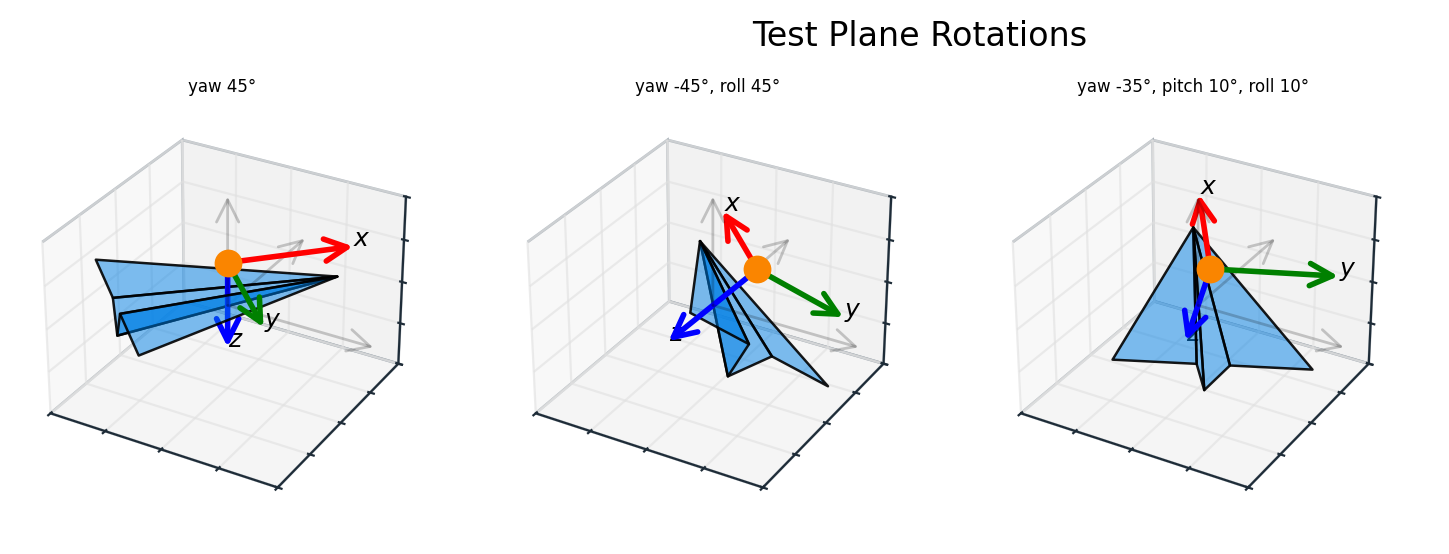

In [13]:
ax1, ax2, ax3 = create_3_panel_plot(sup_title="Test Plane Rotations", title_1="yaw 45°", title_2="yaw -45°, roll 45°", title_3="yaw -35°, pitch 10°, roll 10°")

plane = PaperPlane()
ref_cs = CoordinateSystem(points=np.array([[[0,0,0], [5,0,0]], [[0,0,0], [0,5,0]], [[0,0,0], [0,0,5]]]))

rotation_matrix = yaw_pitch_roll_to_matrix(yaw=45)
plane.matrix_rotate(rotation_matrix)

plane.draw(ax1)

ref_cs.plot_coordinates(ax=ax1, colors=[[0,0,0,0.2],[0,0,0,0.2],[0,0,0,0.2]], show_labels=False, lw=1)


# ##############################################################################


plane = PaperPlane()

rotation_matrix = yaw_pitch_roll_to_matrix(yaw=-45, roll=45)
plane.matrix_rotate(rotation_matrix)

plane.draw(ax2)

ref_cs.plot_coordinates(ax=ax2, colors=[[0,0,0,0.2],[0,0,0,0.2],[0,0,0,0.2]], show_labels=False, lw=1)


# ##############################################################################

plane = PaperPlane()

rotation_matrix = yaw_pitch_roll_to_matrix(yaw=-35, pitch=10, roll=10)
plane.matrix_rotate(rotation_matrix)

plane.draw(ax3)

ref_cs.plot_coordinates(ax=ax3, colors=[[0,0,0,0.2],[0,0,0,0.2],[0,0,0,0.2]], show_labels=False, lw=1)


# ##############################################################################

plt.show()

### Testing Plane Translation and Rotation

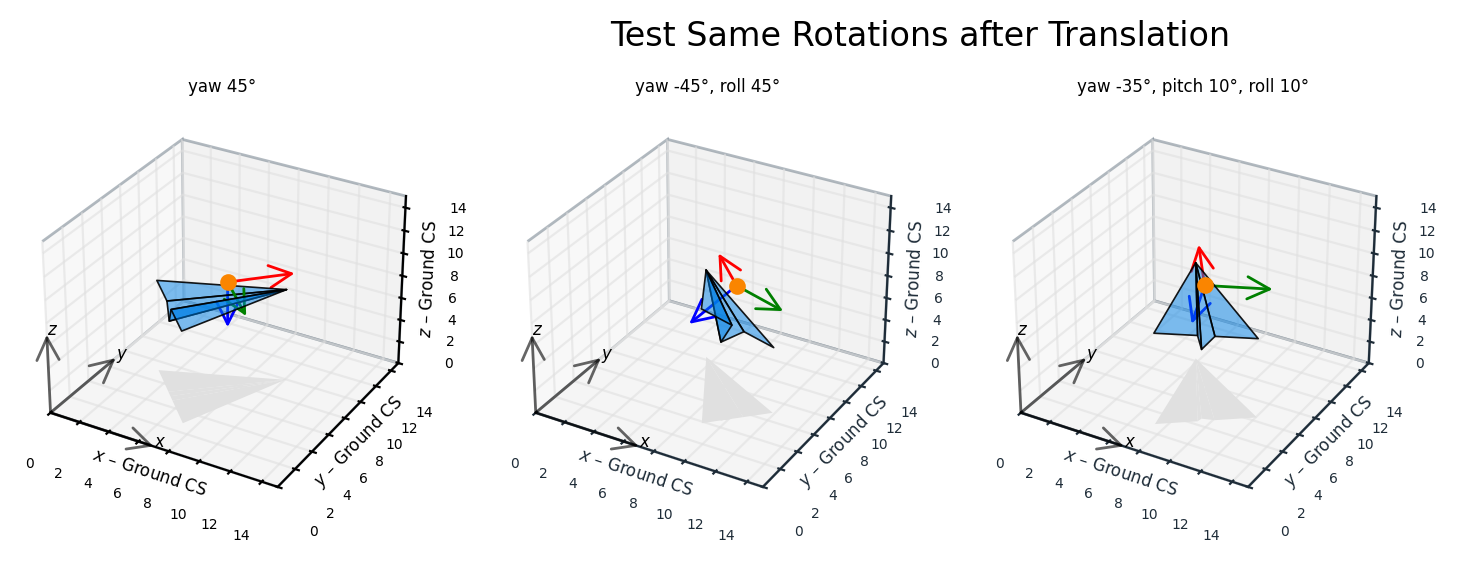

In [2]:
ax1, ax2, ax3 = create_3_panel_plot(sup_title="Test Same Rotations after Translation",
                                    title_1="yaw 45°",
                                    title_2="yaw -45°, roll 45°",
                                    title_3="yaw -35°, pitch 10°, roll 10°",
                                    x_lim=[0, 15], y_lim=[0, 15], z_lim=[0, 15],
                                    show_labels=True,
                                    show_ticks=True,
                                    tick_label_size=5)

plane = PaperPlane()
ref_cs = CoordinateSystem(points=np.array([[[0,0,0], [7,0,0]], [[0,0,0], [0,7,0]], [[0,0,0], [0,0,7]]]))

# ##############################################################################


# Translate in the middle
plane.translate(x=7.5, y=7.5, z=7.5)
# rotate
rotation_matrix = yaw_pitch_roll_to_matrix(yaw=45)
plane.matrix_rotate(rotation_matrix)


plane.draw(ax1, marble_size=5, marble_cs_lw=1, plane_lw=0.6, show_marble_cs_labels=False, shadow_floor=0)
ref_cs.plot_coordinates(ax=ax1, lw=1, colors=[[0,0,0,0.6],[0,0,0,0.6],[0,0,0,0.6]], show_labels=True, label_font_size=6)


# ##############################################################################


plane = PaperPlane()

# Translate in the middle
plane.translate(x=7.5, y=7.5, z=7.5)
# rotate
rotation_matrix = yaw_pitch_roll_to_matrix(yaw=-45, roll=45)
plane.matrix_rotate(rotation_matrix)

plane.draw(ax2, marble_size=5, marble_cs_lw=1, plane_lw=0.6, show_marble_cs_labels=False, shadow_floor=0)

ref_cs.plot_coordinates(ax=ax2, lw=1, colors=[[0,0,0,0.6],[0,0,0,0.6],[0,0,0,0.6]], show_labels=True, label_font_size=6)


# ##############################################################################

plane = PaperPlane()

# Translate in the middle
plane.translate(x=7.5, y=7.5, z=7.5)
# rotate
rotation_matrix = yaw_pitch_roll_to_matrix(yaw=-35, pitch=10, roll=10)
plane.matrix_rotate(rotation_matrix)

plane.draw(ax3, marble_size=5, marble_cs_lw=1, plane_lw=0.6, show_marble_cs_labels=False, shadow_floor=0)

ref_cs.plot_coordinates(ax=ax3, lw=1, colors=[[0,0,0,0.6],[0,0,0,0.6],[0,0,0,0.6]], show_labels=True, label_font_size=6)



## Add a Threat by providing an angle

# TODO: hier gehts weiter, IVO mit deinem netten Zeddl

Known Bearing ($\theta$)
= Angle from North

Given a known Bearing ($\theta$) and a horizontal distance (HzDist) from a known point (Eo,No), the
coordinates (Ep,Np) may be calculated as follows:

Ep = [ Sin($\theta$) x HzDist ] + Eo
Np = [ Cos($\theta$) x HzDist ] + No

This works for ALL bearings 0°<360°

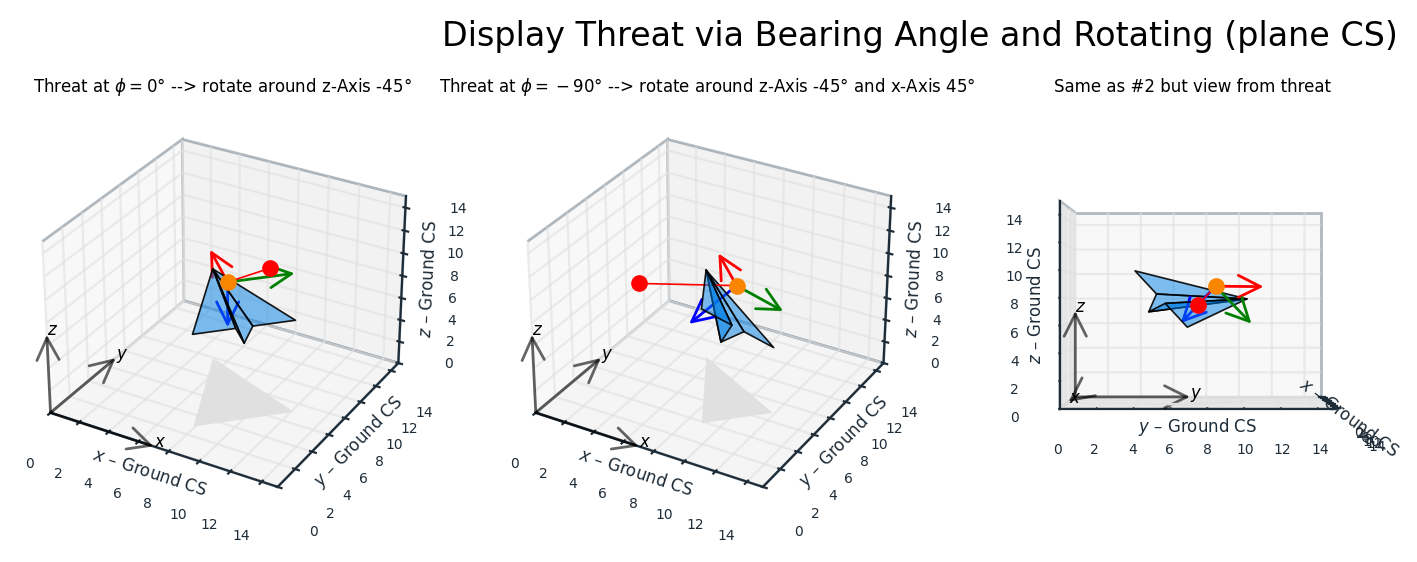

In [5]:
ax1, ax2, ax3 = create_3_panel_plot(sup_title="Display Threat via Bearing Angle and Rotating (plane CS)",
                                    title_1="Threat at $\phi = 0°$ --> rotate around z-Axis -45°",
                                    title_2="Threat at $\phi = -90°$ --> rotate around z-Axis -45° and x-Axis 45°",
                                    title_3="Same as #2 but view from threat",
                                    x_lim=[0, 15], y_lim=[0, 15], z_lim=[0, 15],
                                    show_labels=True,
                                    show_ticks=True,
                                    tick_label_size=5)

plane = PaperPlane()
ref_cs = CoordinateSystem(points=np.array([[[0,0,0], [7,0,0]], [[0,0,0], [0,7,0]], [[0,0,0], [0,0,7]]]))

# ##############################################################################


# Translate in the middle
plane.translate(x=7.5, y=7.5, z=7.5)
# Add threat
plane.add_threat(bearing=0)
# rotate
rotation_matrix = yaw_pitch_roll_to_matrix(yaw=-45)
plane.matrix_rotate(rotation_matrix)


plane.draw(ax1, marble_size=5, marble_cs_lw=1, plane_lw=0.6, show_marble_cs_labels=False, shadow_floor=0)
ref_cs.plot_coordinates(ax=ax1, lw=1, colors=[[0,0,0,0.6],[0,0,0,0.6],[0,0,0,0.6]], show_labels=True, label_font_size=6)


# ##############################################################################


plane = PaperPlane()

# Translate in the middle
plane.translate(x=7.5, y=7.5, z=7.5)
# Add threat
plane.add_threat(bearing=-90)
# rotate
rotation_matrix = yaw_pitch_roll_to_matrix(yaw=-45, roll=45)
plane.matrix_rotate(rotation_matrix)

plane.draw(ax2, marble_size=5, marble_cs_lw=1, plane_lw=0.6, show_marble_cs_labels=False, shadow_floor=0)

ref_cs.plot_coordinates(ax=ax2, lw=1, colors=[[0,0,0,0.6],[0,0,0,0.6],[0,0,0,0.6]], show_labels=True, label_font_size=6)


# ##############################################################################

plane = PaperPlane()

# Translate in the middle
plane.translate(x=7.5, y=7.5, z=7.5)
# Add threat
plane.add_threat(bearing=-90)
# rotate
rotation_matrix = yaw_pitch_roll_to_matrix(yaw=-45, roll=45)
plane.matrix_rotate(rotation_matrix)

plane.draw(ax3, marble_size=5, marble_cs_lw=1, plane_lw=0.6, show_marble_cs_labels=False, shadow_floor=0)

ref_cs.plot_coordinates(ax=ax3, lw=1, colors=[[0,0,0,0.6],[0,0,0,0.6],[0,0,0,0.6]], show_labels=True, label_font_size=6)


ax3.view_init(elev=0, azim=0, roll=0)

plt.show()